In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = iris.data
label = iris.target

In [3]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(scaled_data, label)
print(scaled_data.shape, "→", lda_data.shape)

(150, 4) → (150, 2)


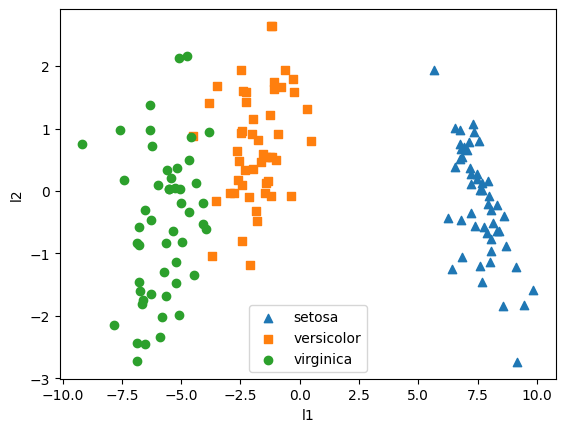

In [12]:
df = pd.DataFrame(lda_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
    f_i = df['label']==i #품종별로 필터링
    df_i = df[f_i] #특정 품종만 추출
    x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
    y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
    plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [14]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc, lda_data, label, scoring='accuracy', cv=5)
print('정확도: ', s)
print('평균: ', s.mean())

정확도:  [1.         1.         0.9        0.93333333 1.        ]
평균:  0.9666666666666666
